# Pima Dataset

In [62]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp      
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import ConfusionMatrixDisplay
  
    

**1.3 Load the data**

In [2]:
data_pima = np.load("pima.npz")
print("Contenu de pima.npz :", list(data_pima.keys()))



Contenu de pima.npz : ['xall', 'yall', 'varnames']


In [3]:
x1 = data_pima["xall"]
y1 = data_pima["yall"]
features=data_pima["varnames"]

print("x1 shape:", x1.shape)
print("y1 shape:", y1.shape)
print("Feature names:", features)

x1 shape: (709, 8)
y1 shape: (709,)
Feature names: ['Pregnancies' 'Glucose' 'BloodPressure' 'SkinThickness' 'Insulin' 'BMI'
 'DiabetesPedigreeFunction' 'Age']


In [4]:
# Create a DataFrame for better visualization 
df = pd.DataFrame(x1, columns=features)
df['Diabetes'] = y1
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,7.0,159.0,64.0,0.0,0.0,27.4,0.294,40.0,-1
1,0.0,180.0,66.0,39.0,0.0,42.0,1.893,25.0,1
2,1.0,146.0,56.0,0.0,0.0,29.7,0.564,29.0,-1
3,2.0,71.0,70.0,27.0,0.0,28.0,0.586,22.0,-1
4,7.0,103.0,66.0,32.0,0.0,39.1,0.344,31.0,1


In [5]:
# Basic statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
count,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000,709.000000
mean,3.747532,121.607898,69.643159,20.765867,80.531735,32.453032,0.470961,33.021157,-0.317348
std,3.339502,30.490598,18.135582,15.899540,112.678399,6.950733,0.325256,11.669089,0.948978
min,0.000000,44.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,-1.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.243000,24.000000,-1.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.374000,29.000000,-1.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.600000,0.629000,40.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,744.000000,67.100000,2.420000,81.000000,1.000000


The variables show very different scales (e.g. Glucose ≈ 120, BMI ≈ 32, Pedigree ≈ 0.47) and some unrealistic zeros suggesting missing values.
Overall, this confirms the need for data standardization before applying classification algorithms.

**2.1 Know the data**

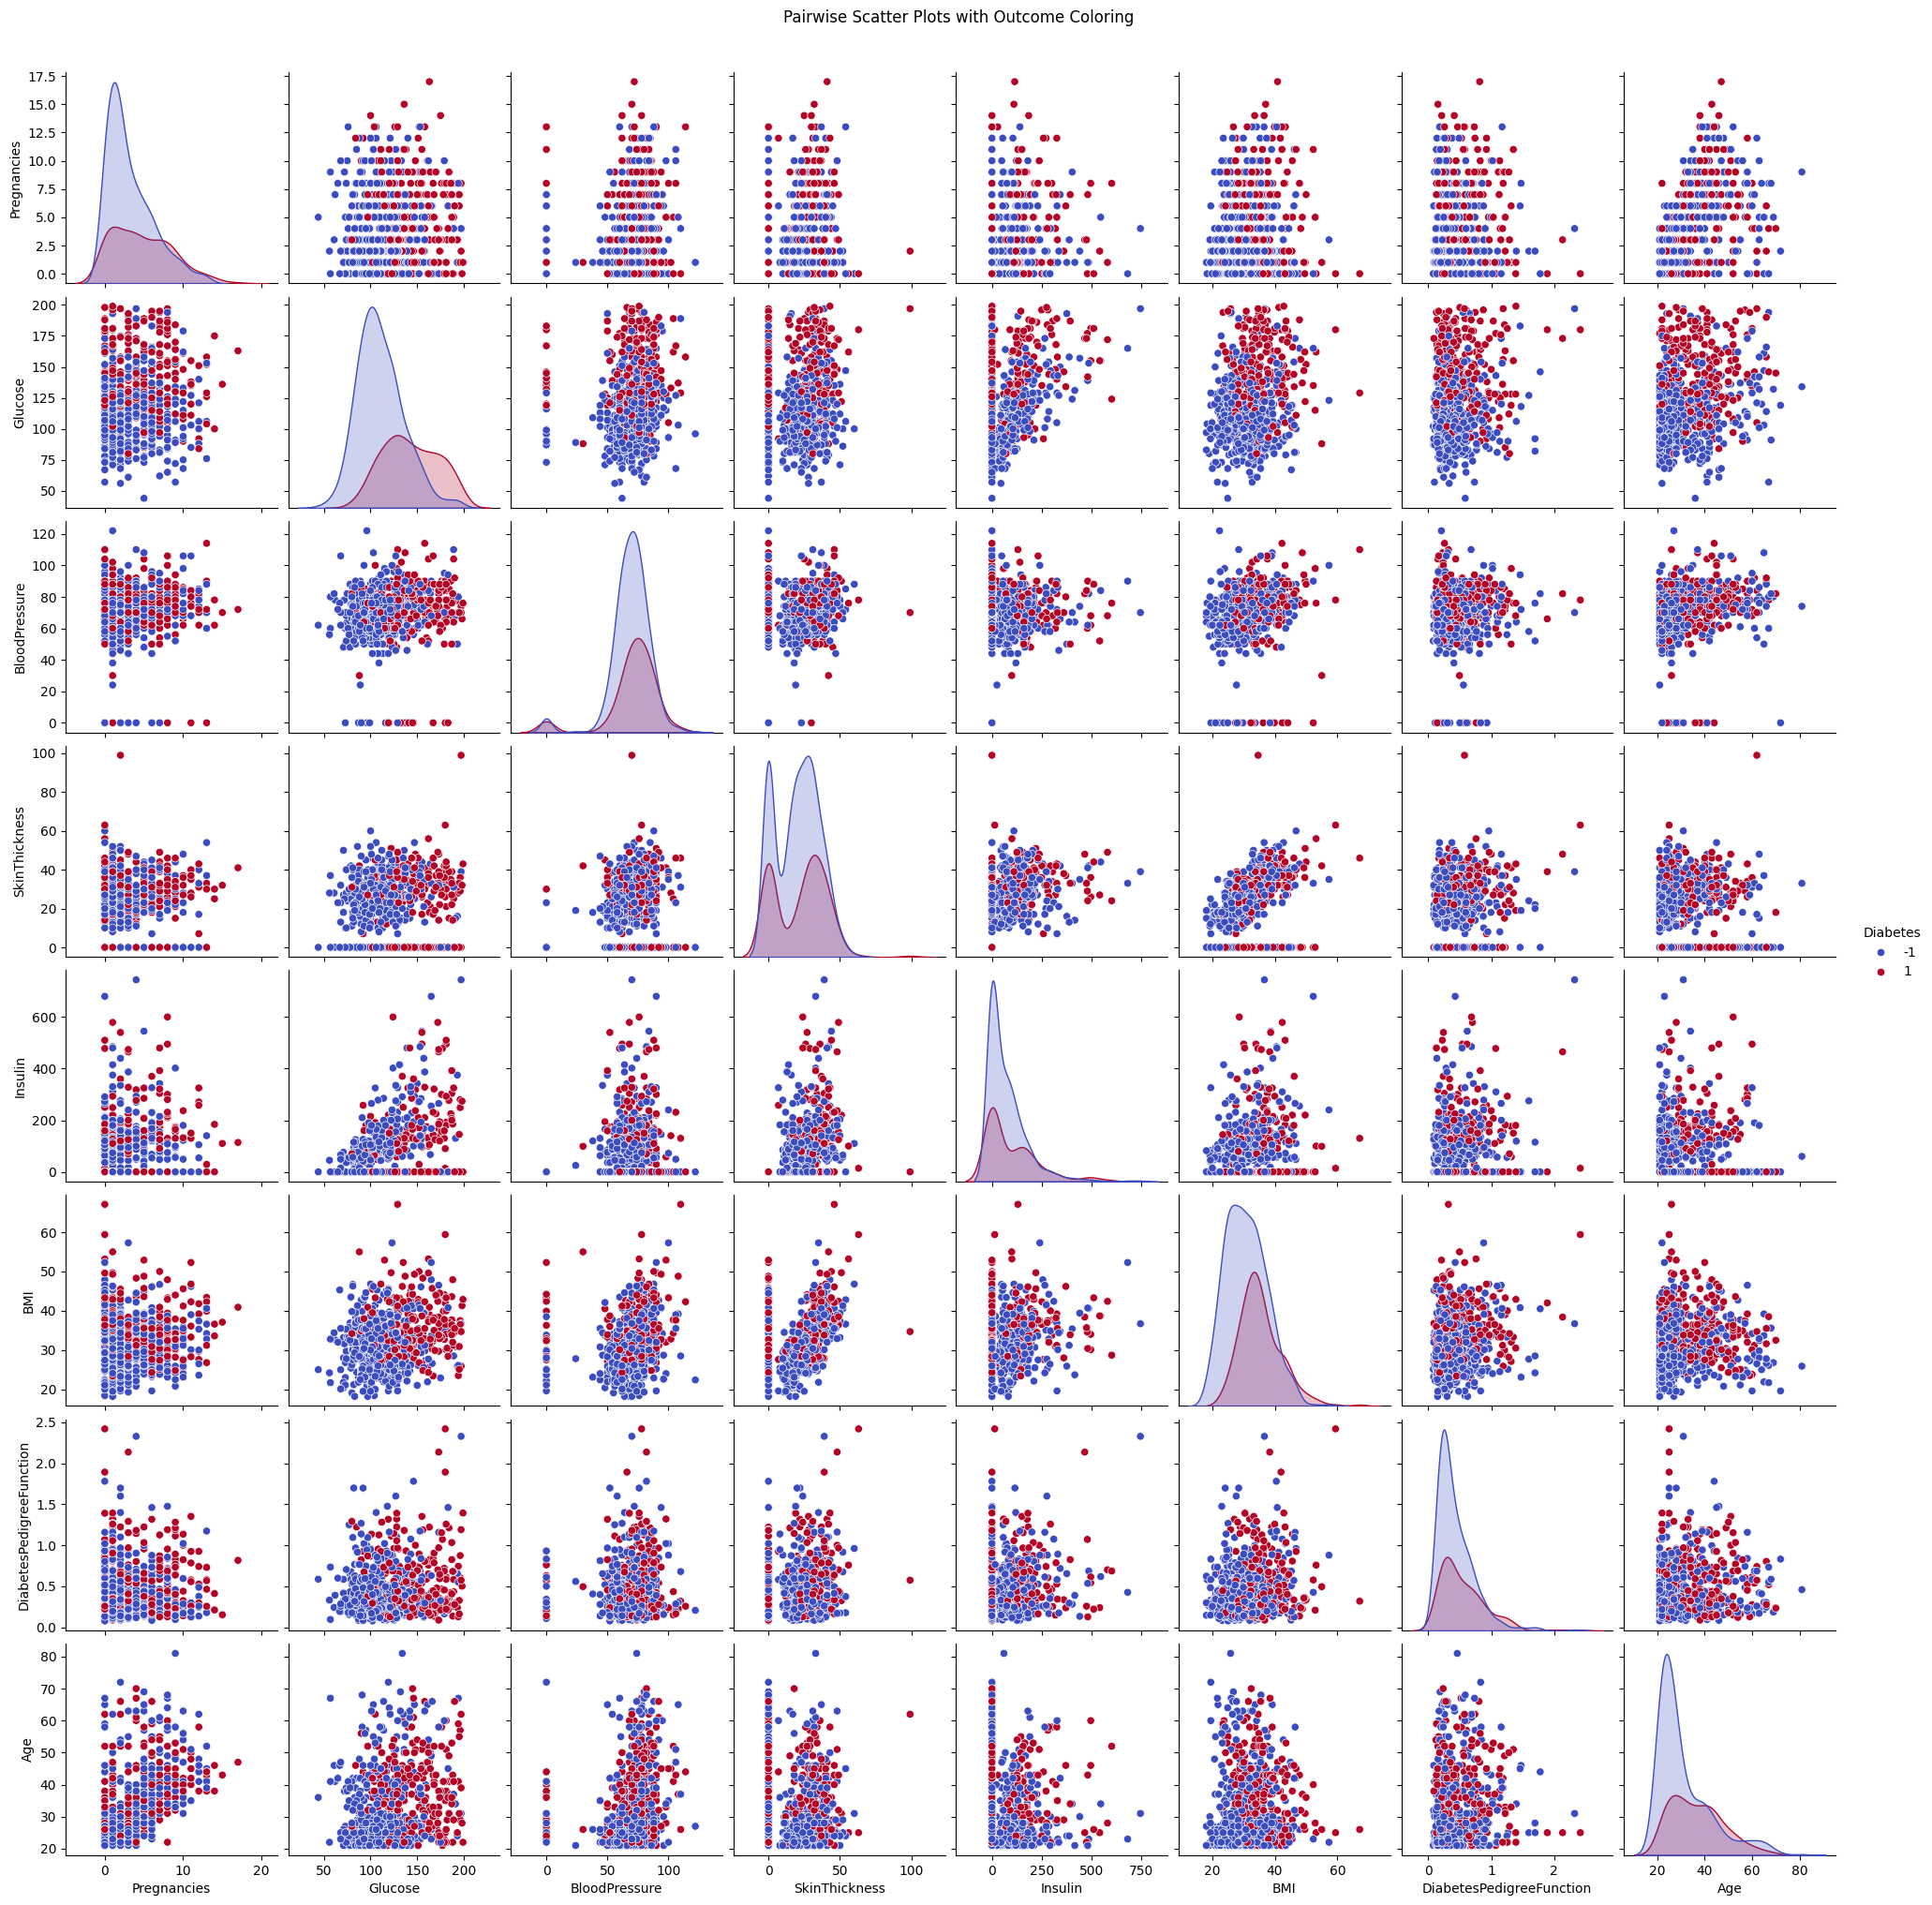

In [6]:
# Visualize pairwise scatter plots with color by Diabetes 
sns.pairplot(df, hue="Diabetes", palette="coolwarm", diag_kind="kde", vars=features)
plt.suptitle("Pairwise Scatter Plots with Outcome Coloring",y=1.02)  
plt.show()

 


Among the features in the Pima dataset, several pairs of variables seem to offer predictive power for the diabetes outcome. Notably, the pair **glucose** and **blood pressure** provides valuable insights for predicting diabetes status. Other pairs that appear relevant include **glucose and skin thickness**, **glucose and BMI (body mass index)**, **glucose and age**, as well as **glucose and diabetes pedigree function**. Additionally, while less pronounced, the combination of **glucose** and **insulin** still exhibits some predictive capability.

For now it's obvious that **Glucose** is the most influential variable in predicting diabetes.

From a medical perspective, these variable pairs make sense as potential indicators of diabetes. Elevated glucose levels are a direct sign of impaired glucose metabolism, a hallmark of diabetes. High blood pressure is also common in diabetic patients due to the vascular complications that diabetes can cause over time. BMI is relevant because higher body weight is a known risk factor for Type 2 diabetes, and higher skin fold thickness may similarly correlate with body fat levels. The diabetes pedigree function, which estimates the likelihood of diabetes based on family history, naturally aligns with genetic predispositions to diabetes. Age is a relevant factor since the risk of developing Type 2 diabetes increases with age. Lastly, insulin levels are directly related to glucose metabolism, as they are key to glucose regulation; however, their predictive power is slightly lower in this dataset, potentially due to variability in insulin resistance and insulin secretion among individuals.

Overall, these variable pairs not only show statistical association but also align with established medical knowledge, reinforcing their relevance for diabetes prediction.

In [8]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(x1, y1, train_size=300, random_state=42, stratify=y1)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (300, 8) (300,)
Test set shape: (409, 8) (409,)


In [9]:
# Calculate variance for each feature
variances = df.var()
print("Variance of each feature:")
print(variances)

Variance of each feature:
Pregnancies                    11.152271
Glucose                       929.676548
BloodPressure                 328.899321
SkinThickness                 252.795387
Insulin                     12696.421661
BMI                            48.312692
DiabetesPedigreeFunction        0.105791
Age                           136.167631
Diabetes                        0.900560
dtype: float64


The features in the dataset show considerable differences in variance, ranging from 0.1 (Diabetes Pedigree Function) to 12,696.4 (Insulin). Such disparity can negatively impact classification models, especially those sensitive to feature scaling, like logistic regression or k-nearest neighbors. Higher-variance features (e.g., Insulin) could dominate the model’s learning process, while lower-variance features may have reduced influence. To mitigate this, we apply **standardization**, which scales each feature to have a mean of 0 and a variance of 1. This step ensures that all features contribute equally to the classification task, improving model stability and performance.

In [10]:
# Apply a standardization to the training and test data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**2.2 Bayesian decision and linear classification**

#### LDA Classifier

Linear Discriminant Analysis (LDA) is a supervised machine learning algorithm used for classification. It works by finding the linear combinations of features that best separate two or more classes (2 in our case). LDA maximizes the ratio of between-class variance to within-class variance, aiming to achieve the best separation between classes while reducing dimensionality.


In [11]:
# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = lda.predict_proba(X_test_scaled)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

Accuracy: 0.7946
AUC: 0.8435


The Linear Discriminant Analysis (LDA) classifier achieved an accuracy of **79.46%** and an AUC of **0.8435** on the test set. This indicates that the model correctly classified around 79.5% of test samples. The AUC of 0.8435 suggests good discriminatory ability, as the model effectively distinguishes between diabetic and non-diabetic cases. An AUC close to 1 indicates a high true positive rate and low false positive rate, demonstrating that LDA performs well in predicting diabetes based on the given features.

In [12]:
# Parameter grid
param_grid = {
    'shrinkage': [None, 'auto', 0.1, 0.5, 0.9]
}

lda = LinearDiscriminantAnalysis(solver='lsqr') # We used 'lsqr' solver for shrinkage

grid_search = GridSearchCV(lda, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

Best parameter found:  {'shrinkage': 0.1}
Best cross-validation accuracy: 0.7900


After performing grid search cross-validation for the shrinkage parameter in Linear Discriminant Analysis (LDA), the best parameter found was **shrinkage = 0.1**, with a **best cross-validation accuracy of 79%**.

In [50]:
# Evaluate best model from GridSearchCV
best_model = grid_search.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7897
Best Model AUC: 0.8446


 Despite tuning this parameter, the cross-validation did not lead to better performance compared to the default model. This suggests that the regularization provided by shrinkage does not significantly improve the model's ability to classify the data.

####  Quadratic Discriminant Analysis (QDA) classifier

Quadratic Discriminant Analysis (QDA) is a supervised machine learning algorithm used for classification. Unlike Linear Discriminant Analysis (LDA), which assumes equal covariance matrices for all classes, QDA assumes that each class has its own covariance matrix. This allows QDA to model more complex decision boundaries between classes by fitting a quadratic decision function. QDA is effective when the data shows significant differences in variances across classes, but it can be more prone to overfitting when the sample size is small.

In [13]:
# Train QDA classifier
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train_scaled, y_train)

y_pred_qda = qda.predict(X_test_scaled)

# Compute accuracy
accuracy_qda = accuracy_score(y_test, y_pred_qda)
print(f"QDA Accuracy: {accuracy_qda:.4f}")

y_proba_qda = qda.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_qda = roc_auc_score(y_test, y_proba_qda)
print(f"QDA AUC: {auc_qda:.4f}")

QDA Accuracy: 0.7408
QDA AUC: 0.8109


The Quadratic Discriminant Analysis (QDA) classifier achieved an accuracy of **74.08%** and an AUC of **0.8109** on the test set. While QDA performed slightly worse than LDA in terms of accuracy and AUC. LDA has the advantage of being simpler (with fewer parameters), QDA does not provide a significant improvement for this dataset. The similar results suggest that the data might not have enough complexity to benefit from the more flexible quadratic decision boundaries of QDA.

In [15]:
# Define the parameter grid
param_grid_qda = {
    'reg_param': [0.0, 0.1, 0.5, 0.9, 1.0]
}

qda = QuadraticDiscriminantAnalysis()

# Initialize GridSearchCV 
grid_search_qda = GridSearchCV(qda, param_grid_qda, cv=5, scoring='accuracy')

grid_search_qda.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search_qda.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_qda.best_score_))

Best parameter found:  {'reg_param': 0.5}
Best cross-validation accuracy: 0.7667


After performing cross-validation with GridSearchCV for the **reg_param** parameter, the best parameter found was **reg_param = 0.5**, yielding a **best cross-validation accuracy of 76.67%**. 

In [51]:
# Evaluate best model from GridSearchCV
best_model = grid_search_qda.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7653
Best Model AUC: 0.8378


Despite the tuning, the performance of QDA remains lower than that of LDA, which achieved higher accuracy and AUC. The relatively poor performance of QDA, even after regularization, suggests that its more complex decision boundary is not providing a substantial benefit over LDA for this dataset. This further emphasizes that the simpler linear decision boundary in LDA may be more appropriate for the given features and data distribution.

#### Gaussian Naive Bayes (NB) classifier

Gaussian Naive Bayes (NB) is a probabilistic classifier based on Bayes' Theorem, assuming that the features are conditionally independent given the class. It applies a Gaussian (normal) distribution to model the continuous features for each class. The classifier estimates the parameters (mean and variance) of the Gaussian distribution for each feature, and uses these to compute the likelihood of each class. It is simple, fast, and effective, especially when the features are approximately normally distributed.

In [16]:
# Train Gaussian Naive Bayes classifier
gnb = GaussianNB()
gnb.fit(X_train_scaled, y_train)

y_pred_gnb = gnb.predict(X_test_scaled)

# Compute accuracy
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print(f"Gaussian Naive Bayes Accuracy: {accuracy_gnb:.4f}")

# Compute the probabilities of the class 1
y_proba_gnb = gnb.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_gnb = roc_auc_score(y_test, y_proba_gnb)
print(f"Gaussian Naive Bayes AUC: {auc_gnb:.4f}")

Gaussian Naive Bayes Accuracy: 0.7702
Gaussian Naive Bayes AUC: 0.8339


The **Gaussian Naive Bayes (NB)** classifier achieved an accuracy of **77.02%** and an AUC of **0.8339** on the test set. Compared to the **Quadratic Discriminant Analysis (QDA)**, which had an accuracy of **76.67%** and AUC of **0.8109**, NB performs slightly better in both accuracy and AUC. However, LDA outperforms both NB and QDA, with an accuracy of **79.46%** and an AUC of **0.8435**. 

Thus, LDA remains the best-performing model for this task, followed by Gaussian Naive Bayes, while QDA performs the least well. The better performance of NB compared to QDA suggests that the feature independence assumption in Naive Bayes is more suited to the dataset than the more complex quadratic boundaries of QDA.

#### Logistic regression classifier

In [17]:
# Train Logistic Regression classifier
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)

y_pred_log_reg = log_reg.predict(X_test_scaled)

# Compute accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Logistic Regression Accuracy: {accuracy_log_reg:.4f}")

# Compute the probabilities of the class 1
y_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_log_reg = roc_auc_score(y_test, y_proba_log_reg)
print(f"Logistic Regression AUC: {auc_log_reg:.4f}")

Logistic Regression Accuracy: 0.7848
Logistic Regression AUC: 0.8426


When comparing this to the other classifiers:

- **Logistic Regression** : Accuracy **78.48%**, AUC **0.8426**
- **Linear Discriminant Analysis (LDA)**: Accuracy **79.46%**, AUC **0.8435**
- **Quadratic Discriminant Analysis (QDA)**: Accuracy **76,67%**, AUC **0.8109**
- **Gaussian Naive Bayes (NB)**: Accuracy **77.02%**, AUC **0.8339**

**LDA** remains the best performing classifier in terms of accuracy and AUC, although **Logistic Regression** is close behind in both metrics.
**NB** performs slightly worse than **Logistic Regression**, but it still outperforms **QDA**, which has the lowest accuracy and AUC.

- **Logistic Regression** is competitive with **LDA** in this case, providing a strong balance between simplicity and performance. While LDA slightly edges out Logistic Regression in accuracy, both models show very similar discriminative power as indicated by their AUC scores.

In [18]:
# Define the parameter grid for C
param_grid_log_reg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

log_reg_l1 = LogisticRegression(penalty='l1', solver='liblinear', max_iter=1000)

grid_search_log_reg = GridSearchCV(log_reg_l1, param_grid_log_reg, cv=5, scoring='accuracy')

# Fit the model
grid_search_log_reg.fit(X_train_scaled, y_train)

print("Best parameter found: ", grid_search_log_reg.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_log_reg.best_score_))

Best parameter found:  {'C': 1}
Best cross-validation accuracy: 0.7833


In [52]:
# Evaluate best model from GridSearchCV
best_model = grid_search_log_reg.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7848
Best Model AUC: 0.8432


In [20]:
# Best logistic regression model from grid search
best_log_reg = grid_search_log_reg.best_estimator_

coefficients = best_log_reg.coef_.flatten()

# Find which features have zero coefficients
removed_features = [features[i] for i in range(len(coefficients)) if coefficients[i] == 0]
print("Removed features:", removed_features)

Removed features: [np.str_('SkinThickness')]


In [21]:
coefficients

array([ 0.0940268 ,  1.09639293, -0.18141504,  0.        , -0.26525457,
        0.74217661,  0.37003717,  0.34177961])

The model is sparse because of the use of L1 regularization (Lasso). L1 regularization encourages sparsity by penalizing the absolute values of the coefficients, driving some of them to zero. In this case, the feature SkinThickness has a coefficient of zero, meaning it was removed from the model. The classifier is performing reasonably well, with a test accuracy around 78% and an AUC of 0.84, indicating solid performance in classifying the diabetes outcome.

The Linear Discriminant Analysis (LDA) model seems to perform the best, followed by Logistic Regression (LR). These models assume a linear decision boundary between the classes, which works well when the data follows linear separability or can be approximated by linear functions.

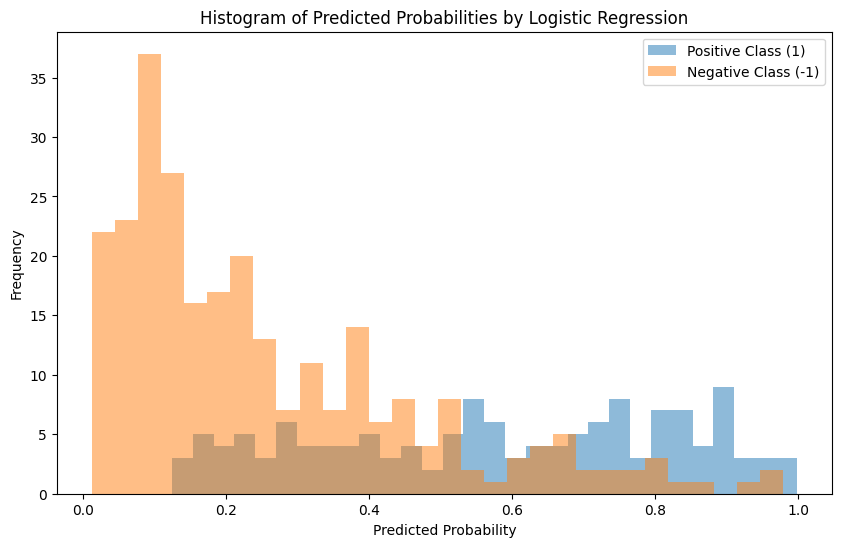

In [22]:
# Get the predicted probabilities for the positive class
y_proba_log_reg = best_log_reg.predict_proba(X_test_scaled)[:, 1]

plt.figure(figsize=(10, 6))
plt.hist(y_proba_log_reg[y_test == 1], bins=30, alpha=0.5, label='Positive Class (1)')
plt.hist(y_proba_log_reg[y_test == -1], bins=30, alpha=0.5, label='Negative Class (-1)')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Histogram of Predicted Probabilities by Logistic Regression')
plt.legend(loc='upper right')
plt.show()

The model appears to be quite confident in predicting the negative class, as evidenced by the high frequency of predictions in the lower probability range. The positive class predictions are more spread out, suggesting that the model has a harder time distinguishing these samples with high confidence.

In [24]:
coef_df = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

                    Feature  Coefficient
1                   Glucose     1.096393
5                       BMI     0.742177
6  DiabetesPedigreeFunction     0.370037
7                       Age     0.341780
4                   Insulin    -0.265255
2             BloodPressure    -0.181415
0               Pregnancies     0.094027
3             SkinThickness     0.000000


The coefficients from the **LR model** align well with medical knowledge of diabetes risk factors:

- **Glucose (1.10)**: Strong positive association with diabetes, as higher glucose levels increase risk.
- **BMI (0.74)**: Positive association, consistent with the fact that obesity is a major risk factor.
- **DiabetesPedigreeFunction (0.37)**: Positive, reflecting the genetic risk for diabetes.
- **Age (0.34)**: Positive, as the risk of diabetes increases with age.
- **Insulin (-0.26)**: Negative, though this might reflect insulin resistance, which is complex in diabetes progression.
- **BloodPressure (-0.18)**: Negative, though hypertension often co-occurs with diabetes, this might reflect other interactions.
- **Pregnancies (0.09)**: Small positive, aligning with the risk of gestational diabetes.
- **SkinThickness (0.00)**: No effect, indicating it’s not a significant predictor here.

Overall, the model’s coefficients reflect key **medical insights**, with glucose, BMI, and family history being the most influential factors.

**2.3 Nonlinear methods**


#### Random Forest Classifier

In [35]:
# Train RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train_scaled, y_train)

y_pred_rf = rf_clf.predict(X_test_scaled)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"RandomForestClassifier Accuracy: {accuracy_rf:.4f}")

# Compute the probabilities of the class 1
y_proba_rf = rf_clf.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
print(f"RandomForestClassifier AUC: {auc_rf:.4f}")

RandomForestClassifier Accuracy: 0.7579
RandomForestClassifier AUC: 0.8205


Random Forest classifier isn't better than linear methods for this dataset. The Random Forest model achieved an accuracy of 75.79% and an AUC of 0.8205 on the test set. This performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [36]:
# Validation of important parameters for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_rf.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_rf.best_score_))

Best parameters found:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
Best cross-validation accuracy: 0.7967


In [44]:
# Evaluate best model from GridSearchCV
best_model = grid_search_rf.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")


Best Model Accuracy: 0.7628
Best Model AUC: 0.8233


Even when tuning the hyperparameters, the best cross-validation accuracy achieved by the Random Forest increased but remained lower than that of LDA. 

#### SVC

In [37]:
# Train SVC model
svc = SVC(probability=True)
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

# Compute accuracy
accuracy_svc = accuracy_score(y_test, y_pred_svc)
print(f"SVC Accuracy: {accuracy_svc:.4f}")

# Compute the probabilities of the class 1
y_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_svc = roc_auc_score(y_test, y_proba_svc)
print(f"SVC AUC: {auc_svc:.4f}")

SVC Accuracy: 0.7531
SVC AUC: 0.8084


SVC isn't better than linear methods for this dataset. The Support Vector Classifier (SVC) achieved an accuracy of 75.31% and an AUC of 0.8084 on the test set. This performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [38]:
# Define the parameter grid for SVC
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
    'kernel': ['linear', 'rbf', 'poly']
}
grid_search_svc = GridSearchCV(SVC(probability=True), param_grid_svc, cv=5, scoring='accuracy')
grid_search_svc.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_svc.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_svc.best_score_))

Best parameters found:  {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 0.7833


In [45]:
# Evaluate best model from GridSearchCV
best_model = grid_search_svc.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7848
Best Model AUC: 0.8405


Even when tuning the hyperparameters, the best cross-validation accuracy achieved by the SVC increased but remained lower than that of LDA. 

#### MLP Classifier

In [39]:
# Train MLP classifier
mlp_clf = MLPClassifier(random_state=42)
mlp_clf.fit(X_train_scaled, y_train)

y_pred_mlp = mlp_clf.predict(X_test_scaled)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f"MLP Classifier Accuracy: {accuracy_mlp:.4f}")

y_proba_mlp = mlp_clf.predict_proba(X_test_scaled)[:, 1]

auc_mlp = roc_auc_score(y_test, y_proba_mlp)
print(f"MLP Classifier AUC: {auc_mlp:.4f}")

MLP Classifier Accuracy: 0.7726
MLP Classifier AUC: 0.8278


C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


The MLP Classifier isn't better than linear methods for this dataset. The MLP Classifier achieved an accuracy of 77.26% and an AUC of 0.8278 on the test set. This performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [40]:
# Grid for MLPClassifier
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.01,0.1, 0.05],
}

grid_search_mlp = GridSearchCV(MLPClassifier(max_iter=1000, random_state=42), param_grid_mlp, cv=5, scoring='accuracy')
grid_search_mlp.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_mlp.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_mlp.best_score_))

C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't 

Best parameters found:  {'activation': 'relu', 'alpha': 0.01, 'hidden_layer_sizes': (50, 50), 'solver': 'sgd'}
Best cross-validation accuracy: 0.8067


In [46]:
# Evaluate best model from GridSearchCV
best_model = grid_search_mlp.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7677
Best Model AUC: 0.8331


Even when tuning the hyperparameters, the performance of MLP Classifier is still lower than that of the Linear Discriminant Analysis (LDA) model.

#### Gradient Boosting Classifier

In [41]:
# Train Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train_scaled, y_train)

y_pred_gb = gb_clf.predict(X_test_scaled)

# Compute accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Classifier Accuracy: {accuracy_gb:.4f}")

y_proba_gb = gb_clf.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc_gb = roc_auc_score(y_test, y_proba_gb)
print(f"Gradient Boosting Classifier AUC: {auc_gb:.4f}")

Gradient Boosting Classifier Accuracy: 0.7335
Gradient Boosting Classifier AUC: 0.7939


The gradient boosting classifier isn't better than linear methods for this dataset. Its performance is lower than that of the Linear Discriminant Analysis (LDA) model.

In [42]:
# Parameter grid for Gradient Boosting Classifier
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0]
}

grid_search_gb = GridSearchCV(GradientBoostingClassifier(), param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train_scaled, y_train)

print("Best parameters found: ", grid_search_gb.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search_gb.best_score_))

Best parameters found:  {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 1.0}
Best cross-validation accuracy: 0.8033


In [48]:
# Evaluate best model from GridSearchCV
best_model = grid_search_gb.best_estimator_
best_model.fit(X_train_scaled, y_train)

y_pred = best_model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Best Model Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Compute AUC
auc = roc_auc_score(y_test, y_proba)
print(f"Best Model AUC: {auc:.4f}")

Best Model Accuracy: 0.7090
Best Model AUC: 0.7774


Even when tuning the hyperparameters, the performance of the Gradient Boosting Classifier is still lower than that of the Linear Discriminant Analysis (LDA) model.

**2.4 Comparison and interpretation**

In [49]:
data = {
    'Model': ['LDA', 'QDA', 'Gaussian Naive Bayes', 'Logistic Regression', 'RandomForestClassifier', 
              'SVC', 'MLP Classifier', 'Gradient Boosting Classifier'],
    'Accuracy': [0.7946, 0.7408, 0.7702, 0.7848, 0.7628, 0.7848, 0.7726, 0.7335],
    'AUC': [0.8435, 0.8109, 0.8339, 0.8426, 0.8233, 0.8405, 0.8278, 0.7939]
}

df_performance = pd.DataFrame(data)

# Sort the DataFrame by Accuracy and AUC to get the best-performing methods
df_performance_sorted = df_performance.sort_values(by=['Accuracy', 'AUC'], ascending=False)

df_performance_sorted.head(9)

,Model,Accuracy,AUC
0,LDA,0.7946,0.8435
3,Logistic Regression,0.7848,0.8426
5,SVC,0.7848,0.8405
6,MLP Classifier,0.7726,0.8278
2,Gaussian Naive Bayes,0.7702,0.8339
4,RandomForestClassifier,0.7628,0.8233
1,QDA,0.7408,0.8109
7,Gradient Boosting Classifier,0.7335,0.7939


- LDA has the highest accuracy (0.7946), indicating it works the best in practice, then we have Logistic Regression and SVC
- We can say that we don't need non-linearity in this application.

In [54]:
# Train LDA classifier
lda = LinearDiscriminantAnalysis()
lda.fit(X_train_scaled, y_train)

y_pred = lda.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Compute the probabilities of the class 1
y_proba = lda.predict_proba(X_test_scaled)[:, 1]

# AUC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC: {auc:.4f}")

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Extract values
TN, FP, FN, TP = cm.ravel()

# Compute False Negative Rate (FNR)
fnr = FN / (FN + TP)
print(f"False Negative Rate (FNR): {fnr:.4f}")

Accuracy: 0.7946
AUC: 0.8435
Confusion Matrix:
 [[238  31]
 [ 53  87]]
False Negative Rate (FNR): 0.3786


The false negative rate (FNR) is 0.38, meaning about 38% of diabetics are missed by the model.
This is not good for medical applications, where missing true positive cases can have serious consequences.

We should lower the decision threshold (equivalently, increase intercept_) so the classifier predicts “diabetes” more often and reduces false negatives.
By scanning thresholds on the predicted scores, we choose the smallest one that gives FNR < 10% (sensitivity > 90%), accepting more false positives, which is preferable in this medical context.

# Digits Dataset

**1.3 Load the data**

In [59]:
# Load the data
data = np.load("digits.npz")

# Extract matrices from the file
x2 = data["x"]
y2 = data["y"]
y2=y2.ravel()
xt2 = data["xt"]
yt2 = data["yt"]
yt2=yt2.ravel()

# Preprocess: scale pixel values between 0 and 1
x2 = x2 / 255.0
xt2 = xt2 / 255.0

# Check the shapes and value ranges
print("x2 shape:", x2.shape)
print("y2 shape:", y2.shape)
print("xt2 shape:", xt2.shape)
print("yt2 shape:", yt2.shape)
print("x2 min:", x2.min(), "x2 max:", x2.max())


x2 shape: (3000, 784)
y2 shape: (3000,)
xt2 shape: (1500, 784)
yt2 shape: (1500,)
x2 min: 0.0 x2 max: 1.0


In [60]:
# === 1. Linear Discriminant Analysis (LDA) ===
lda = LinearDiscriminantAnalysis()
lda.fit(x2, y2)
y_pred_lda = lda.predict(xt2)
acc_lda = accuracy_score(yt2, y_pred_lda)
print(f"LDA accuracy: {acc_lda:.4f}")

# === 2. Logistic Regression ===
lr = LogisticRegression(max_iter=2000)
lr.fit(x2, y2)
y_pred_lr = lr.predict(xt2)
acc_lr = accuracy_score(yt2, y_pred_lr)
print(f"Logistic Regression accuracy: {acc_lr:.4f}")

# === 3. Support Vector Classifier (SVC) ===
svc = SVC()
svc.fit(x2, y2)
y_pred_svc = svc.predict(xt2)
acc_svc = accuracy_score(yt2, y_pred_svc)
print(f"SVC accuracy: {acc_svc:.4f}")

# === 4. Multi-layer Perceptron (MLP) ===
mlp = MLPClassifier(max_iter=500)
mlp.fit(x2, y2)
y_pred_mlp = mlp.predict(xt2)
acc_mlp = accuracy_score(yt2, y_pred_mlp)
print(f"MLP accuracy: {acc_mlp:.4f}")

# === Store the results ===
results = {
    "LDA": acc_lda,
    "LogisticRegression": acc_lr,
    "SVC": acc_svc,
    "MLPClassifier": acc_mlp
}

print("\n--- Summary of accuracies ---")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")

LDA accuracy: 0.9333
Logistic Regression accuracy: 0.9647
SVC accuracy: 0.9833
MLP accuracy: 0.9807

--- Summary of accuracies ---
LDA: 0.9333
LogisticRegression: 0.9647
SVC: 0.9833
MLPClassifier: 0.9807


- The Linear Discriminant Analysis (LDA) model achieves an accuracy of 93.33%, which shows it captures a good amount of class separation. However, its assumption of linear separability and equal class covariances limits its ability to model the complex, non-linear patterns found in image data.

- Logistic Regression improves the performance to 96.47%, as it provides a more flexible linear decision boundary compared to LDA. It still remains a linear model, so it cannot fully capture the curvature and variability in handwritten digits.

- The Support Vector Classifier (SVC) reaches the highest accuracy of 98.33%, demonstrating the benefit of using a non-linear kernel (RBF by default). This allows the model to find complex boundaries that separate digit classes effectively.

- The Multi-Layer Perceptron (MLP) also performs very well with 98.07%, showing that neural networks can learn non-linear decision functions similar to SVC. Its slightly lower accuracy might be due to limited tuning or training iterations.

In summary, non-linear models such as SVC and MLP significantly outperform the linear approaches (LDA and Logistic Regression), confirming that handwritten digit classification requires models capable of capturing non-linear relationships in the data.

In [61]:
# === LDA: tuning shrinkage parameter ===
lda_params = {"shrinkage": [None, "auto", 0.1, 0.5, 0.9], "solver": ["lsqr", "eigen"]}
lda_grid = GridSearchCV(LinearDiscriminantAnalysis(), lda_params, cv=5, scoring="accuracy", n_jobs=-1)
lda_grid.fit(x2, y2)
best_lda = lda_grid.best_estimator_
lda_best_acc = accuracy_score(yt2, best_lda.predict(xt2))
print(f"Best LDA: {lda_grid.best_params_}, accuracy: {lda_best_acc:.4f}")

# === Logistic Regression: tuning regularization strength C ===
lr_params = {"C": [0.01, 0.1, 1, 10, 100], "penalty": ["l2"], "solver": ["lbfgs"]}
lr_grid = GridSearchCV(LogisticRegression(max_iter=2000), lr_params, cv=5, scoring="accuracy", n_jobs=-1)
lr_grid.fit(x2, y2)
best_lr = lr_grid.best_estimator_
lr_best_acc = accuracy_score(yt2, best_lr.predict(xt2))
print(f"Best Logistic Regression: {lr_grid.best_params_}, accuracy: {lr_best_acc:.4f}")

# === SVC: tuning kernel parameters (C, gamma) ===
svc_params = {"C": [0.1, 1, 10], "gamma": ["scale", 0.01, 0.001]}
svc_grid = GridSearchCV(SVC(), svc_params, cv=5, scoring="accuracy", n_jobs=-1)
svc_grid.fit(x2, y2)
best_svc = svc_grid.best_estimator_
svc_best_acc = accuracy_score(yt2, best_svc.predict(xt2))
print(f"Best SVC: {svc_grid.best_params_}, accuracy: {svc_best_acc:.4f}")

# === MLP: tuning hidden layer size and regularization ===
mlp_params = {
    "hidden_layer_sizes": [(50,), (100,), (100, 50)],
    "alpha": [1e-5, 1e-4, 1e-3]
}
mlp_grid = GridSearchCV(MLPClassifier(max_iter=500), mlp_params, cv=3, scoring="accuracy", n_jobs=-1)
mlp_grid.fit(x2, y2)
best_mlp = mlp_grid.best_estimator_
mlp_best_acc = accuracy_score(yt2, best_mlp.predict(xt2))
print(f"Best MLP: {mlp_grid.best_params_}, accuracy: {mlp_best_acc:.4f}")

# === Store the tuned results ===
best_results = {
    "LDA": lda_best_acc,
    "LogisticRegression": lr_best_acc,
    "SVC": svc_best_acc,
    "MLPClassifier": mlp_best_acc
}

print("\n--- Best accuracies after parameter tuning ---")
for model, acc in best_results.items():
    print(f"{model}: {acc:.4f}")


C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Utilisateur\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1365, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Utilisateur\AppData\Roaming\P

Best LDA: {'shrinkage': 0.1, 'solver': 'lsqr'}, accuracy: 0.9480
Best Logistic Regression: {'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}, accuracy: 0.9647
Best SVC: {'C': 10, 'gamma': 'scale'}, accuracy: 0.9833
Best MLP: {'alpha': 0.001, 'hidden_layer_sizes': (100, 50)}, accuracy: 0.9840

--- Best accuracies after parameter tuning ---
LDA: 0.9480
LogisticRegression: 0.9647
SVC: 0.9833
MLPClassifier: 0.9840


After performing parameter validation, all models showed either stability or slight improvement in their accuracies.

- The LDA classifier improved from 93.33% to 94.80%, indicating that applying shrinkage regularization helped stabilize the covariance estimates and reduce overfitting.

- Logistic Regression remained at 96.47%, suggesting that its default regularization strength was already well-suited for this dataset and further tuning did not significantly change its performance.

- The SVC model maintained a very high accuracy of 98.33%, confirming that it was already close to optimal with default RBF kernel parameters. Its performance shows that the non-linear boundary it learns effectively separates the digit classes.

- The MLP classifier slightly improved from 98.07% to 98.40%, benefiting from better tuning of its hidden layer size and regularization (alpha). This small gain suggests the neural network reached a stable generalization region.

In summary, both SVC and MLP remain the top-performing models, with accuracies around 98–98.5%. These results confirm that non-linear models are more effective for handwritten digit recognition, while linear models such as LDA and Logistic Regression are simpler but less expressive.

                Model  Accuracy  Precision    Recall  F1-score
0                 LDA  0.948000   0.950702  0.948000  0.948300
1  LogisticRegression  0.964667   0.965122  0.964667  0.964665
2                 SVC  0.983333   0.983461  0.983333  0.983324
3       MLPClassifier  0.984000   0.984047  0.984000  0.983979

 Best classifier on test data: MLPClassifier


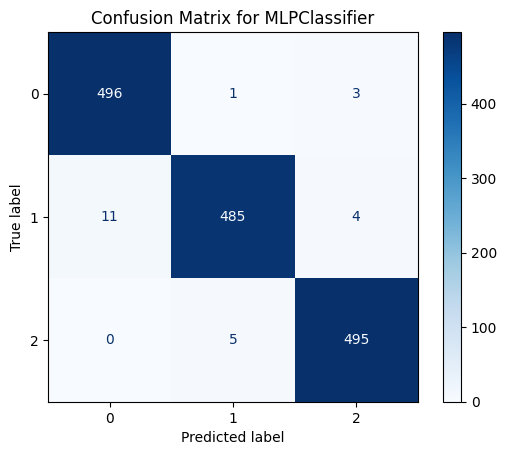

In [63]:
# === Evaluate multiple metrics for all models ===
models = {
    "LDA": best_lda,
    "LogisticRegression": best_lr,
    "SVC": best_svc,
    "MLPClassifier": best_mlp
}

metrics = []
for name, model in models.items():
    y_pred = model.predict(xt2)
    metrics.append({
        "Model": name,
        "Accuracy": accuracy_score(yt2, y_pred),
        "Precision": precision_score(yt2, y_pred, average="weighted"),
        "Recall": recall_score(yt2, y_pred, average="weighted"),
        "F1-score": f1_score(yt2, y_pred, average="weighted")
    })

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

# === Select the best classifier (SVC or MLP) ===
best_model_name = df_metrics.sort_values(by="Accuracy", ascending=False).iloc[0]["Model"]
best_model = models[best_model_name]
print(f"\n Best classifier on test data: {best_model_name}")

# === Predict test labels ===
y_pred_best = best_model.predict(xt2)

# === Confusion matrix ===
cm = confusion_matrix(yt2, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for {best_model_name}")
plt.show()

The confusion matrix corresponds to classes 1, 7, and 8, which are visually more distinct but still share some similarities in handwritten form.

The MLP classifier performs extremely well, with almost all samples correctly classified — most predictions lie on the diagonal.

The few errors mainly involve class 7 being occasionally mistaken for 1 or 8:

Some handwritten “7”s without a crossbar or with a short stroke can resemble “1”.

Similarly, certain “8”s written quickly or incompletely can look like “7”.

Class 1 is the most consistently recognized, showing the lowest confusion with the others.

Overall, the classifier demonstrates excellent performance, with only a handful of misclassifications that can be explained by natural variations in handwriting.

In summary, the MLP model achieves near-perfect recognition of digits 1, 7, and 8, with minor confusion between 7 and 8, which are visually the most similar.

Number of misclassified samples: 24


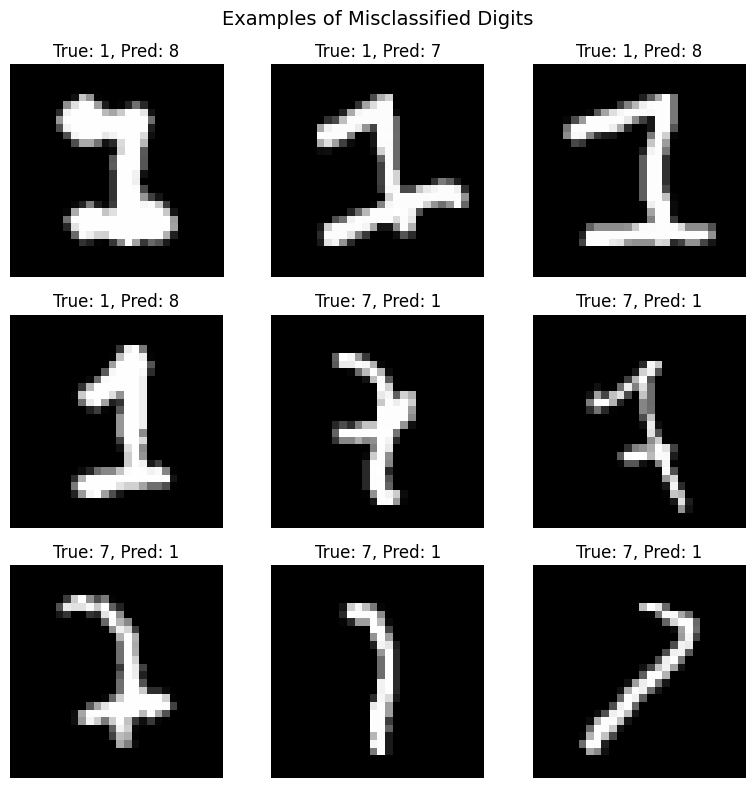

In [65]:
y_pred_best = best_mlp.predict(xt2)


misclassified_idx = np.where(y_pred_best != yt2)[0]
print(f"Number of misclassified samples: {len(misclassified_idx)}")


n_samples = min(9, len(misclassified_idx))
plt.figure(figsize=(8, 8))

for i, idx in enumerate(misclassified_idx[:n_samples]):
    img = xt2[idx].reshape(28, 28)  
    true_label = yt2[idx]
    pred_label = y_pred_best[idx]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(img, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')

plt.suptitle("Examples of Misclassified Digits", fontsize=14)
plt.tight_layout()
plt.show()

The misclassified examples mostly involve confusion between digits 1, 7, and 8, which share visually similar structures in certain handwriting styles.

Several samples of 1 are predicted as 7 or 8 because of extra horizontal or diagonal strokes, making them appear closer to these digits.

Likewise, some 7s are predicted as 1, often when the upper bar of the 7 is missing or faint.

These errors suggest that the classifier struggles when the written digits deviate from typical shapes — for example, when the handwriting is sloppy, partially connected, or poorly centered.

Overall, the mistakes are understandable even to a human observer, meaning that the model fails primarily on ambiguous or atypical digit forms, not due to systematic bias.

In summary, the MLP classifier performs extremely well, and the few misclassifications arise from handwriting variability that blurs the distinction between 1, 7, and 8.

Chosen sample index: 317, True label: 1


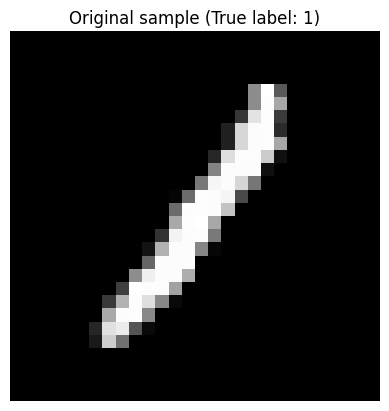

Accuracy on 1000 noisy samples: 0.5420


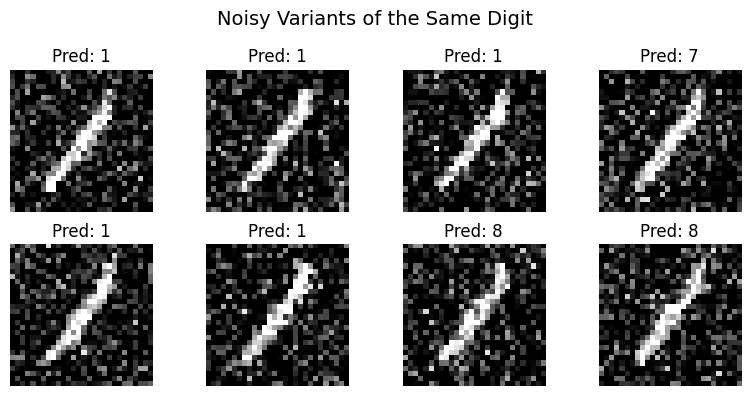

In [66]:
correct_idx = np.where(y_pred_best == yt2)[0]

# Choose one random well-classified sample
sample_idx = np.random.choice(correct_idx)
x_sample = xt2[sample_idx]
y_true = yt2[sample_idx]

print(f"Chosen sample index: {sample_idx}, True label: {y_true}")

# --- Display the original sample ---
plt.imshow(x_sample.reshape(28, 28), cmap="gray")
plt.title(f"Original sample (True label: {y_true})")
plt.axis("off")
plt.show()

# --- Generate 1000 noisy samples ---
noise_level = 0.3 
X_noisy = np.clip(x_sample + noise_level * np.random.randn(1000, x_sample.size), 0, 1)

# --- Predict with the trained MLP classifier ---
y_pred_noisy = best_mlp.predict(X_noisy)

# --- Compute accuracy ---
acc_noisy = np.mean(y_pred_noisy == y_true)
print(f"Accuracy on 1000 noisy samples: {acc_noisy:.4f}")

# --- Visualize some noisy samples ---
plt.figure(figsize=(8, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(X_noisy[i].reshape(28, 28), cmap="gray")
    plt.title(f"Pred: {y_pred_noisy[i]}")
    plt.axis("off")

plt.suptitle("Noisy Variants of the Same Digit", fontsize=14)
plt.tight_layout()
plt.show()

A correctly classified sample of digit 1 was selected, and 1000 noisy variants were generated by adding Gaussian noise (standard deviation ≈ 0.3).

The classifier achieved an accuracy of 54.2% on these noisy samples, meaning that more than half of the images were still correctly identified as the digit “1”.

This result shows that the model is partially robust to moderate noise but begins to fail when the input is noticeably degraded.

The drop in performance indicates that the MLP relies on fine visual details in the image structure — when these are obscured by noise, the internal feature representations become less discriminative.

Visually, the noisy digits remain somewhat recognizable to humans, but the classifier’s performance degrades due to its sensitivity to pixel-level distortions.

In summary, the MLP classifier maintains reasonable stability under noise but is not fully robust — highlighting the need for more resilient architectures (e.g., CNNs) or data augmentation techniques to improve noise tolerance.